In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('cleaned_data.csv')
data.head()

,Company Name,Job Title,Job Description,Rating,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary,state,age
0,Tecolote Research,Data Scientist,data scientistloc albuquerqu nmeduc requir bac...,3.8,"Goleta, CA",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53.0,91.0,72.0,NM,47
1,University of Maryland Medical System,Healthcare Data Scientist,gener summaryth healthcar data scientist posit...,3.4,"Baltimore, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63.0,112.0,87.5,MD,36
2,KnowBe4,Data Scientist,knowb inc high growth inform secur compani wor...,4.8,"Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,80.0,90.0,85.0,FL,10
3,PNNL,Data Scientist,organ job id job id director earth biolog scie...,3.8,"Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",56.0,97.0,76.5,WA,55
4,Affinity Solutions,Data Scientist,data scientistaffin solut market cloud seek sm...,2.9,"New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",86.0,143.0,114.5,NY,22


In [3]:
#replace losagngles with CA
data['state'].replace(data[data['state'].apply(lambda x:len(x.strip())>2)]['state'],'CA',inplace=True)


In [4]:
data['stateb']=data['state'].apply(lambda x:x.strip())

In [5]:
data.drop(['state'],axis=1,inplace=True)

In [6]:
# working on Jobtitle

def jobtitleprocess(x):
    if 'data scientist' in x.lower():
        return 'data scientist'
    elif 'data engineer' in x.lower():
        return 'data engineer'
    elif 'analyst' in x.lower():
        return 'analyst'
    elif 'manager' in x.lower():
        return 'manager'
    else:
        return 'special role'
        

In [7]:
data['jobtitle']=data['Job Title'].apply(jobtitleprocess)

In [8]:
def seniority(x):
    if 'sr' in x.lower() or 'senior' in x.lower() or 'lead' in x.lower() or 'pricipal' in x.lower():
        return 'sr'
    elif 'jr' in x.lower() or 'junior' in x.lower() or 'asst' in x.lower() or 'assistant' in x.lower():
        return 'jr'
    else:
        return 'ass'

In [9]:
data['seniority']=data['Job Title'].apply(seniority)

In [10]:
data.drop(['Job Title'],axis=1,inplace=True)

In [11]:
# process compitators

data['num_comp']=data['Competitors'].apply(lambda x:len(x.split(",")) if x!='-1' else 0)

In [12]:
data.drop(['Competitors'],axis=1,inplace=True)

In [13]:
def revenueprocess(x):
    if '$' in x :
        if 'than' in x.lower():
            x=x.split('than')[1]
        x=x.strip().lower()
        x=x.replace('(usd)',"").replace('$',"")
        x=x.replace('million','000000').replace('to',"").replace('billion','00000000').replace('+','')
        x=x.split()
        if len(x)==2:
            x=int(x[0]+x[1])
        elif len(x)==3:
            x=int(x[0]+x[2])+int(x[1]+x[2])/2
        elif len(x)==4:
            x1=x[0]+x[1]
            x2=x[2]+x[3]
            x=(int(x1)+int(x2))/2
        else:
            x=0
        
    elif 'unknown' in x.lower():
        x=0
    return x

In [14]:
data['revenue']=data['Revenue'].apply(revenueprocess)

In [15]:
data['revenue']=data['revenue'].astype(int)

In [16]:
#ownership process
def ownershipprocess(x):
    x=x.strip()
    
    x=x.lower().replace('- ',"")
    #x="_".join([i.strip() for i in x.split()])
    x=x.split(' or ')[0]    
    x=x.split('/')[0].strip()
    x=x.replace(" ","_")
    
    return x



In [17]:
data['ownershiptype']=data['Type of ownership'].apply(ownershipprocess)

In [18]:
data.drop(['Type of ownership','Revenue'],axis=1,inplace=True)

In [19]:
data.describe()

,Rating,min_salary,max_salary,avg_salary,age,num_comp,revenue
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,7.420000e+02
mean,3.618868,74.068733,127.183288,100.626011,46.591644,1.053908,3.086685e+08
std,0.801210,31.869282,46.909006,38.855948,53.778815,1.384239,3.663626e+08
min,-1.000000,10.000000,16.000000,13.500000,-1.000000,0.000000,-1.000000e+00
25%,3.300000,52.000000,96.000000,73.500000,11.000000,0.000000,0.000000e+00
50%,3.700000,69.500000,124.000000,97.500000,24.000000,0.000000,2.000000e+08
75%,4.000000,91.000000,155.000000,122.500000,59.000000,3.000000,3.500000e+08
max,5.000000,202.000000,306.000000,254.000000,276.000000,4.000000,1.000000e+09


In [20]:
data["Jobdesclen"]=data['Job Description'].apply(lambda x:len(x))

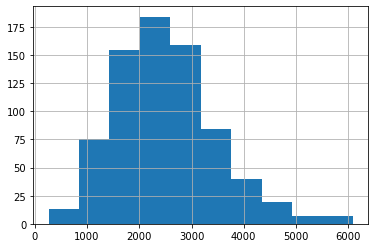

In [21]:
data["Jobdesclen"].hist()

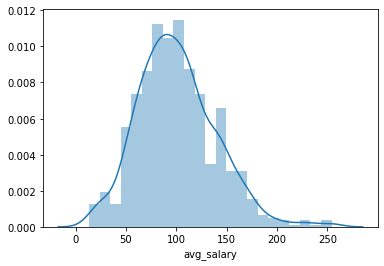

In [22]:
sns.distplot(data['avg_salary'])

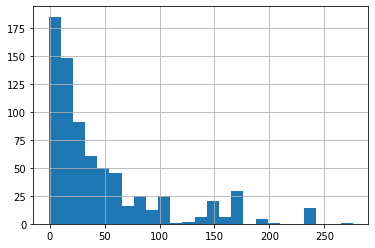

In [23]:
data.age.hist(bins=25)

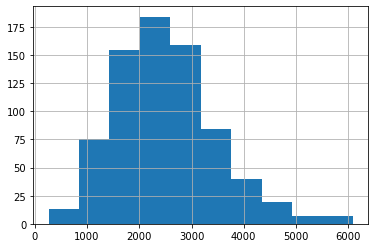

In [24]:
data['Jobdesclen'].hist()

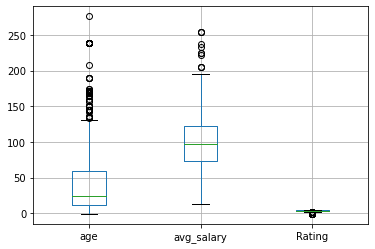

In [25]:
data.boxplot(column = ['age','avg_salary','Rating'])

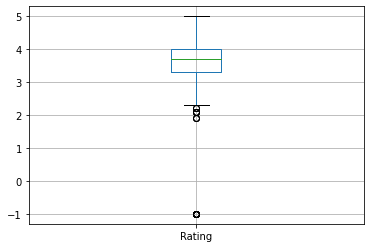

In [26]:
data.boxplot(column = 'Rating')

In [27]:
data[['age','avg_salary','Rating','Jobdesclen']].corr()

,age,avg_salary,Rating,Jobdesclen
age,1.000000,0.019655,0.021655,0.166075
avg_salary,0.019655,1.000000,0.013492,0.076858
Rating,0.021655,0.013492,1.000000,-0.027926
Jobdesclen,0.166075,0.076858,-0.027926,1.000000


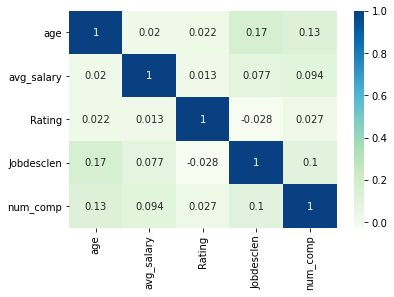

In [28]:
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data[['age','avg_salary','Rating','Jobdesclen','num_comp']].corr(),annot=True,cmap="GnBu")

In [64]:
#getting categorical data

cat=[]
for i,j in zip(data.dtypes.index,data.dtypes.values):
    if j==object:
        cat.append(i)
cat.remove('Job Description')

graph for Company Name: total = 343


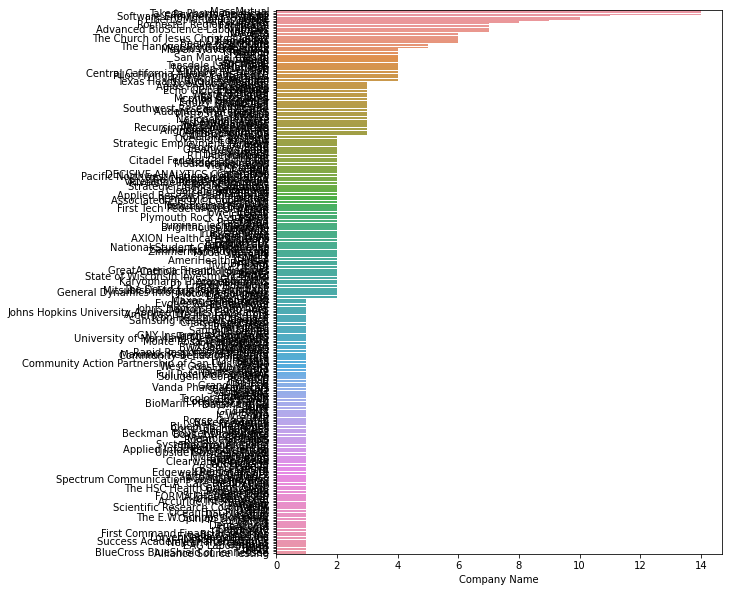

graph for Headquarters: total = 198


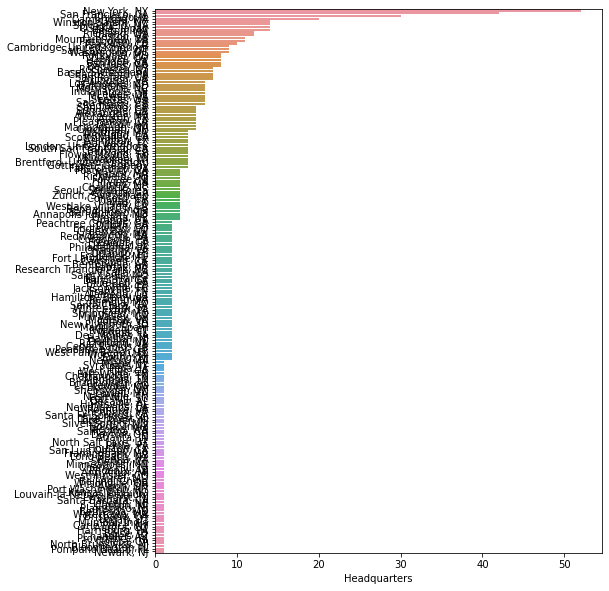

graph for Size: total = 9


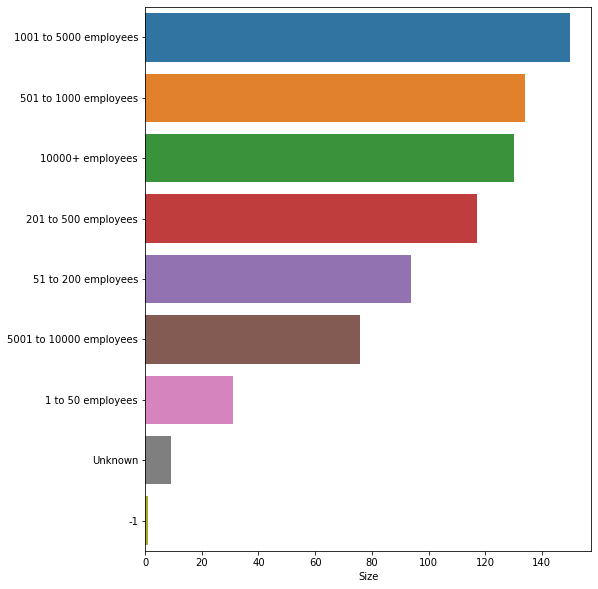

graph for Industry: total = 60


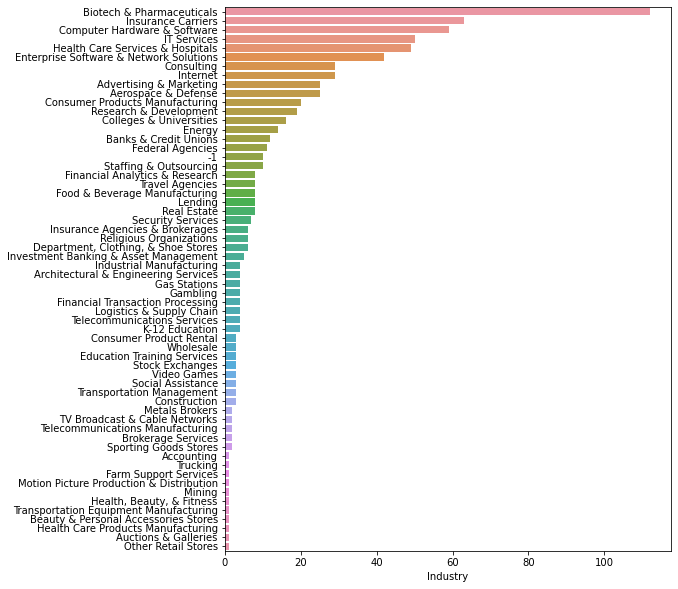

graph for Sector: total = 25


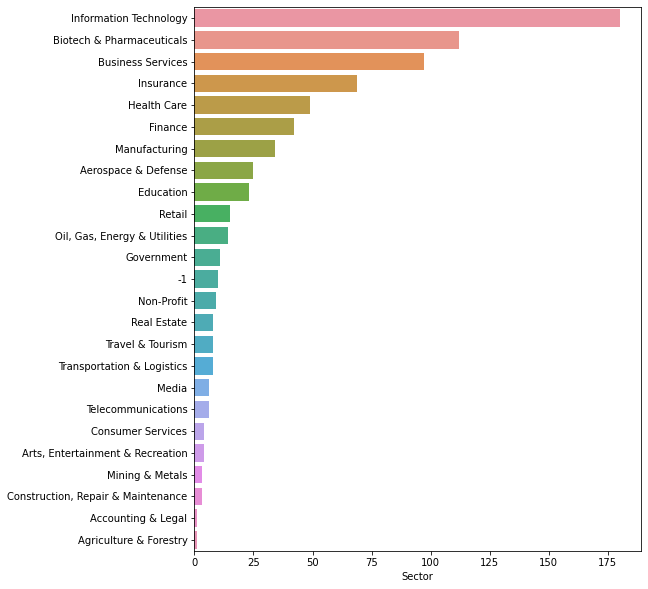

graph for stateb: total = 37


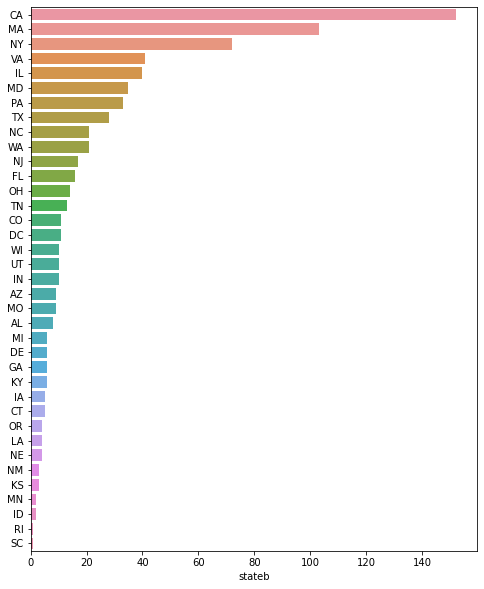

graph for jobtitle: total = 5


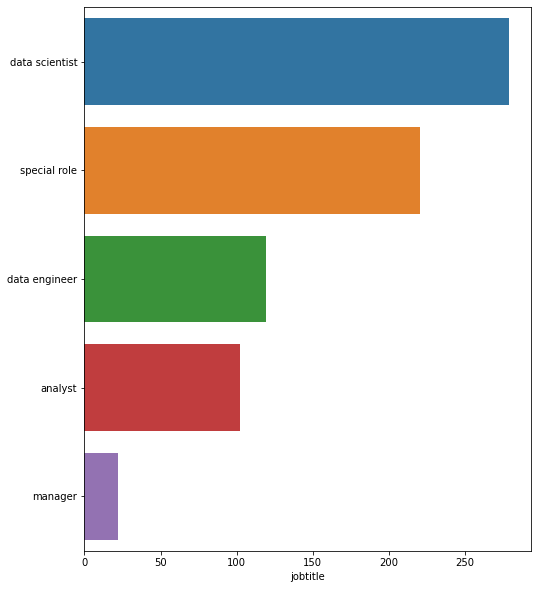

graph for seniority: total = 3


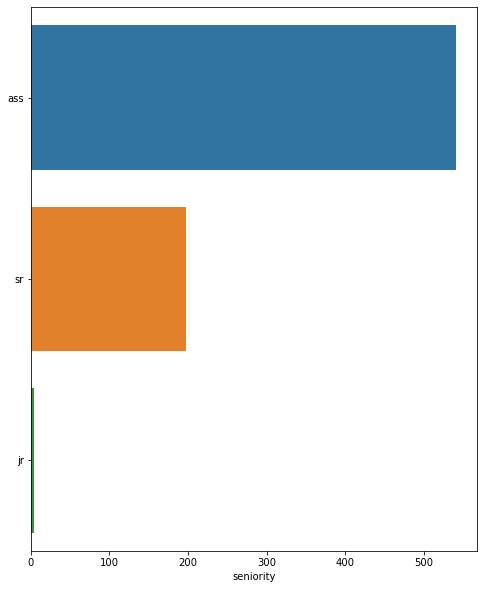

graph for ownershiptype: total = 11


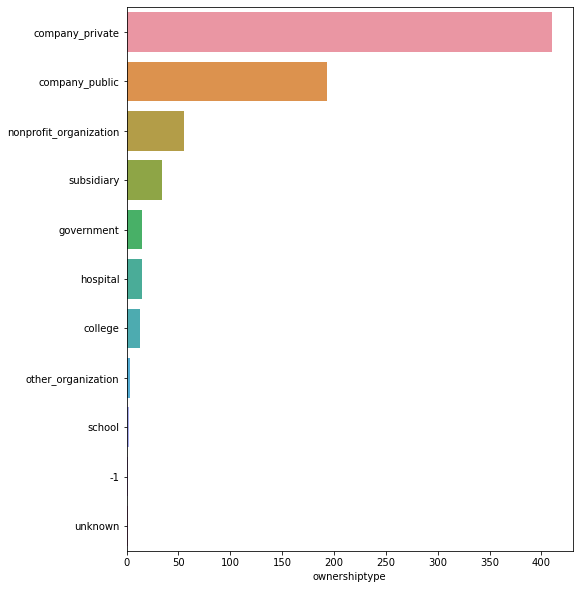

In [71]:
for i in data[cat].columns:
    plt.figure(figsize=(8,10))
    cat_num=data[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(y=cat_num.index, x=cat_num)
    plt.show()

graph for Company Name: total = 30


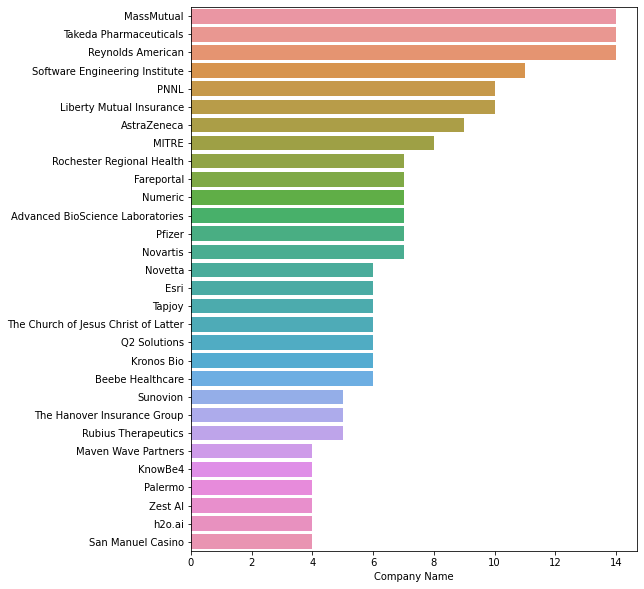

graph for Headquarters: total = 30


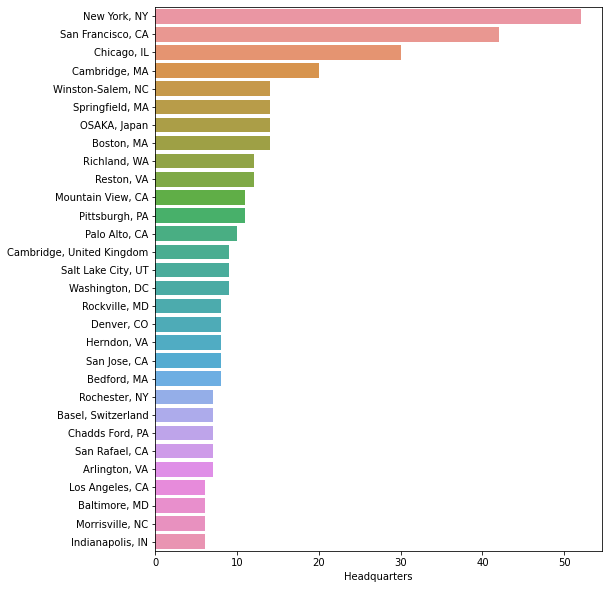

graph for Size: total = 9


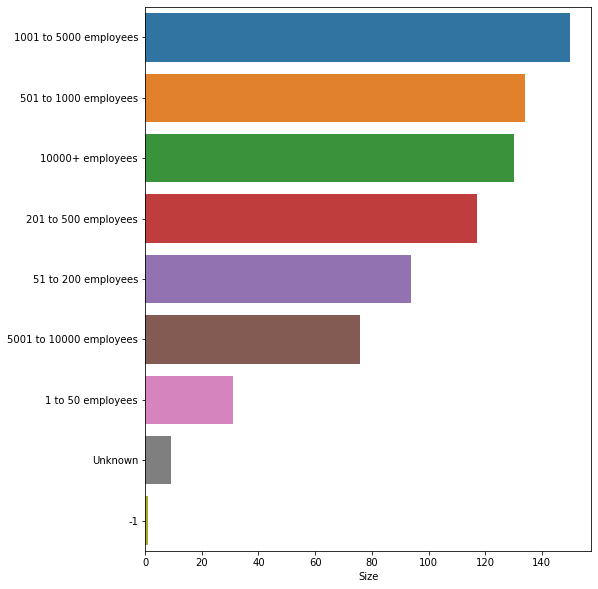

graph for Industry: total = 30


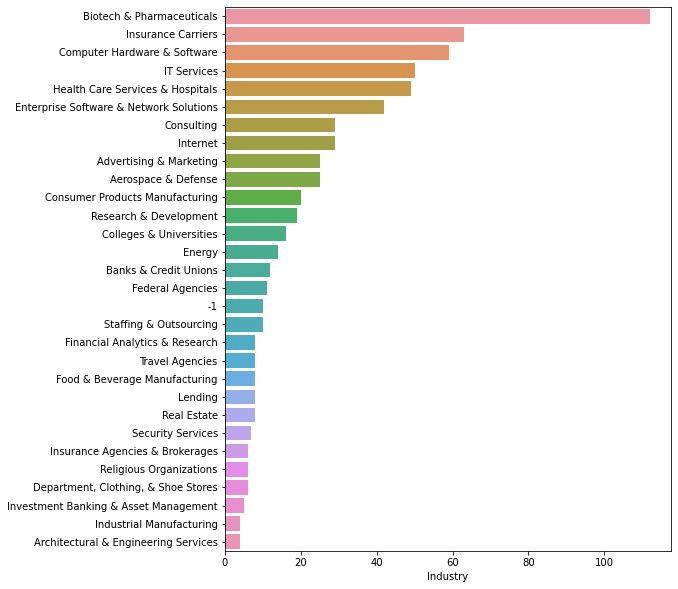

graph for Sector: total = 25


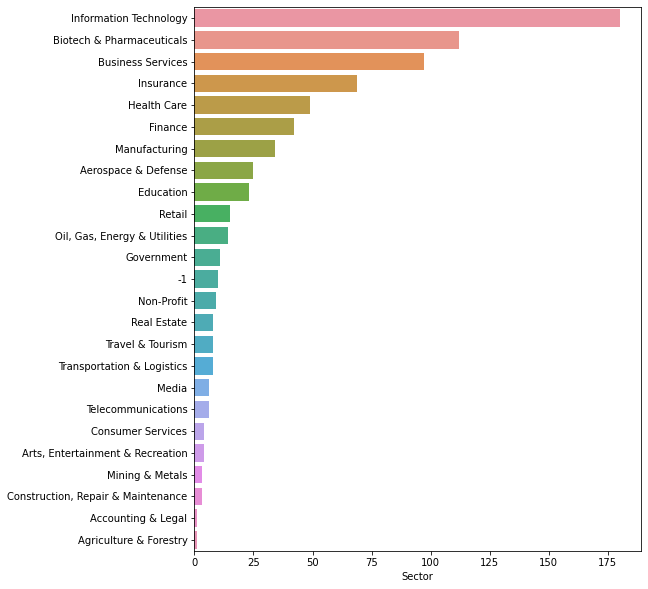

graph for stateb: total = 30


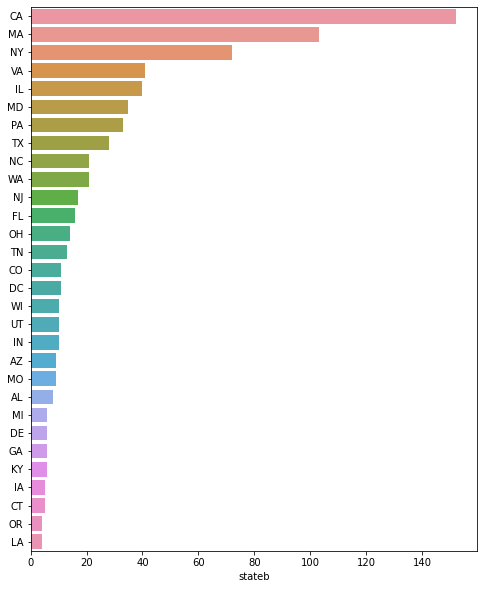

graph for jobtitle: total = 5


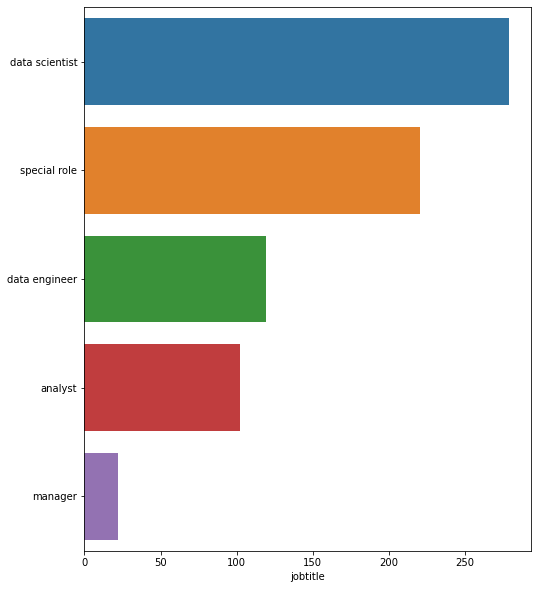

graph for seniority: total = 3


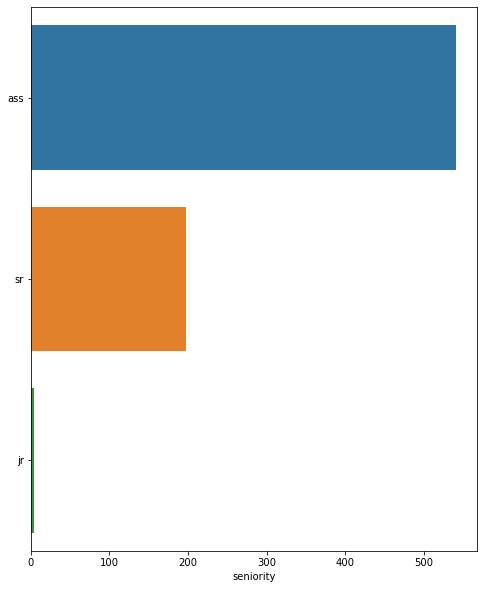

graph for ownershiptype: total = 11


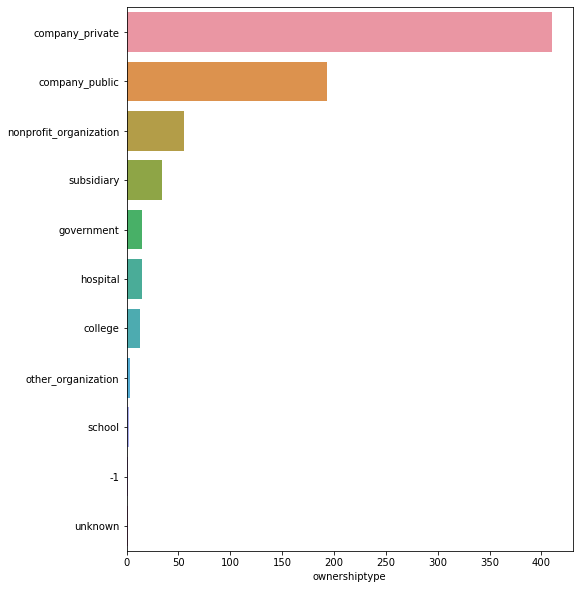

In [73]:
for i in data[cat].columns:
    plt.figure(figsize=(8,10))
    cat_num=data[i].value_counts()[:30]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(y=cat_num.index, x=cat_num)
    plt.show()

In [74]:
data.columns

Index(['Company Name', 'Job Description', 'Rating', 'Headquarters', 'Size',
       'Industry', 'Sector', 'min_salary', 'max_salary', 'avg_salary', 'age',
       'stateb', 'jobtitle', 'seniority', 'num_comp', 'revenue',
       'ownershiptype', 'Jobdesclen'],
      dtype='object')

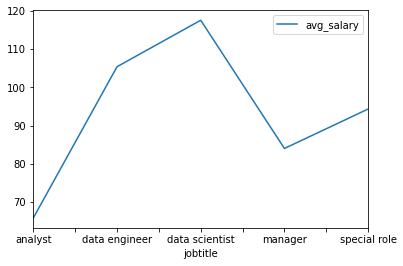

In [80]:
pd.pivot_table(data,index='jobtitle',values='avg_salary').plot()

In [78]:

pd.options.display.max_rows
pd.set_option('display.max_rows', None)

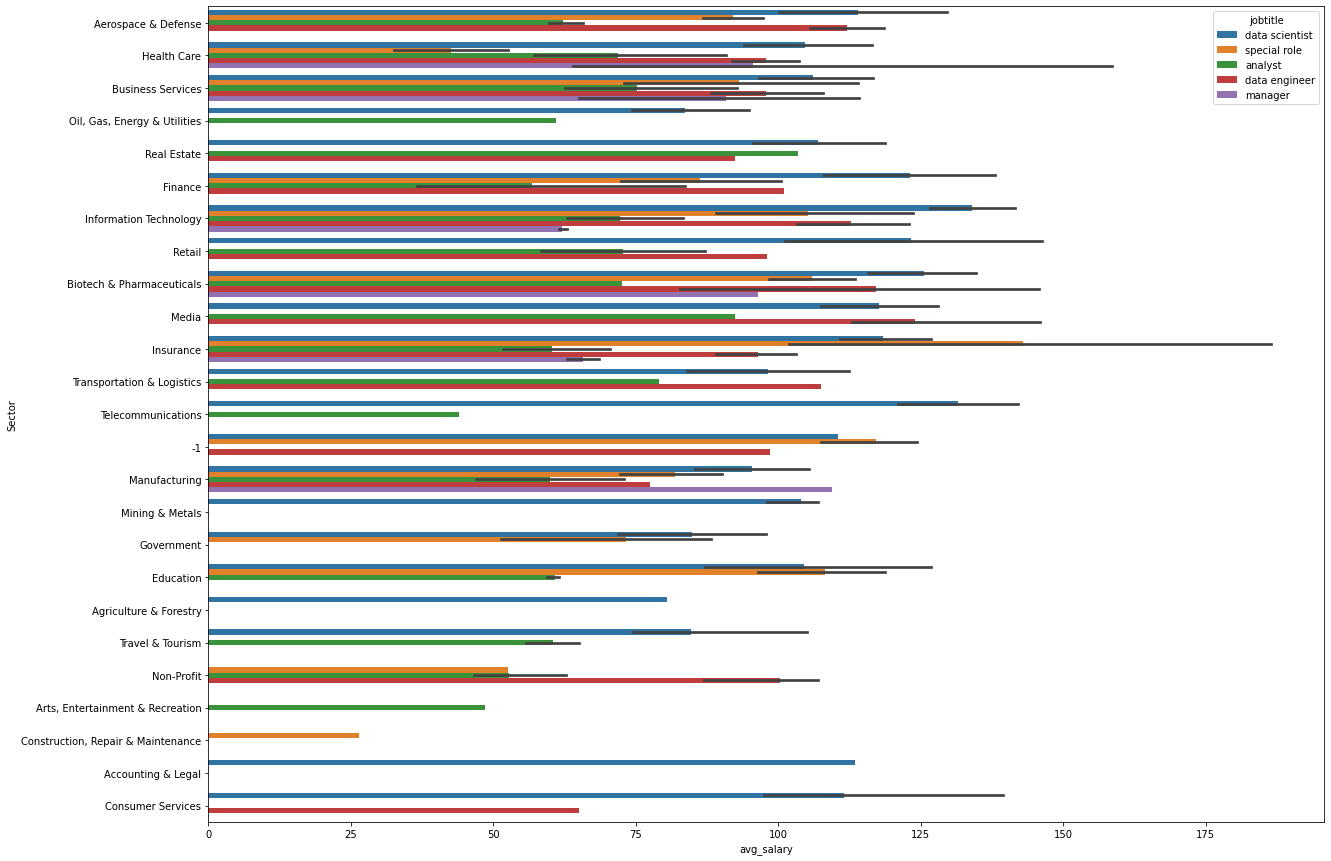

In [94]:
#pd.pivot_table(data,index=['Sector','jobtitle'],values='avg_salary')[:20].plot(kind='bar')
plt.figure(figsize=(20,15))
sns.barplot(y='Sector',x='avg_salary',hue='jobtitle',data=data)

plt.show()

In [108]:
#how many roles of each kind in each state 
pd.pivot_table(data, index = ['stateb','jobtitle'], values = 'avg_salary',aggfunc='count').sort_values('stateb', ascending = False)

avg_salary
stateb jobtitle                  
WI     special role             4
       data scientist           3
       analyst                  3
WA     special role             1
       data scientist          17
       analyst                  3
VA     special role             7
       data scientist          18
       data engineer           10
       analyst                  6
UT     data engineer            3
       analyst                  4
       data scientist           3
TX     special role             7
       data scientist          13
       data engineer            8
TN     data scientist           1
       data engineer           10
       analyst                  2
SC     special role             1
RI     analyst                  1
PA     data scientist           6
       data engineer            1
       analyst                  8
       manager                  3
       special role            15
OR     data scientist           3
       data engineer            1
OH     special role             3
       data scientist           7
       analyst                  4
NY     special role            14
       data scientist          40
       data engineer            4
       analyst                 14
NM     data scientist           3
NJ     data scientist           4
       analyst                  6
       data engineer            2
       manager                  2
       special role             3
NE     special role             4
NC     special role            12
       data scientist           3
       data engineer            6
MO     special role             3
       manager                  1
       data scientist           3
       analyst                  2
MN     data engineer            1
       analyst                  1
MI     manager                  2
       data scientist           4
MD     special role            16
       data scientist          13
       data engineer            3
       analyst                  3
MA     special role            52
       manager                  5
       data scientist          30
       data engineer           12
       analyst                  4
LA     analyst                  1
       special role             1
       data engineer            2
KY     data scientist           2
       special role             4
KS     special role             3
IN     special role             4
       data scientist           2
       data engineer            4
IL     special role            14
       data scientist          15
       data engineer            8
       analyst                  3
ID     analyst                  2
IA     data engineer            3
       analyst                  2
GA     data scientist           3
       special role             3
FL     data engineer            3
       analyst                  6
       data scientist           7
DE     special role             6
DC     data scientist           5
       data engineer            4
       analyst                  2
CT     special role             3
       data scientist           2
CO     data scientist           3
       data engineer            3
       analyst                  1
       special role             4
CA     special role            32
       manager                  9
       data scientist          68
       data engineer           25
       analyst                 18
AZ     data scientist           1
       data engineer            5
       analyst                  1
       special role             2
AL     special role             2
       data engineer            1
       analyst                  5

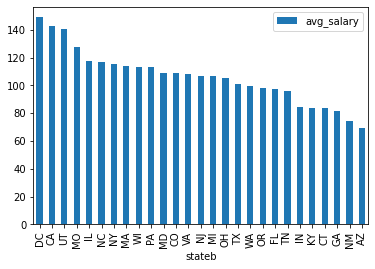

In [112]:
# datascientist salary in each state
pd.pivot_table(data[data.jobtitle == 'data scientist'], index = 'stateb', values = 'avg_salary').sort_values('avg_salary', ascending = False).plot(kind='bar')

In [113]:
data.columns


Index(['Company Name', 'Job Description', 'Rating', 'Headquarters', 'Size',
       'Industry', 'Sector', 'min_salary', 'max_salary', 'avg_salary', 'age',
       'stateb', 'jobtitle', 'seniority', 'num_comp', 'revenue',
       'ownershiptype', 'Jobdesclen'],
      dtype='object')

In [120]:
df_pivot=data[['Company Name','Rating', 'Headquarters', 'Size',
       'Industry', 'Sector','age',
       'stateb', 'jobtitle', 'seniority', 'num_comp', 'revenue',
       'ownershiptype','avg_salary']]

In [127]:
for i in df_pivot.columns:
    if i !='avg_salary':
        print(i)
        print(pd.pivot_table(df_pivot,index=i,values='avg_salary').sort_values('avg_salary',ascending=False))
        

Company Name
                                                    avg_salary
Company Name                                                  
Gallup                                              237.500000
Sage Intacct                                        232.500000
CA                                                  225.000000
Grand Rounds                                        221.500000
Credit Sesame                                       205.000000
The Climate Corporation                             194.000000
Grainger                                            179.500000
Samsung Research America                            177.000000
Nektar Therapeutics                                 174.000000
DTCC                                                173.000000
Two Sigma                                           172.000000
BioMarin Pharmaceutical                             168.000000
Confluent                                           168.000000
Quartet Health                            

Peachtree Corners, GA        13.500000
Size
                         avg_salary
Size                               
Unknown                  128.111111
-1                       117.500000
10000+ employees         112.230769
51 to 200 employees      111.351064
1 to 50 employees        102.306452
201 to 500 employees     100.247863
5001 to 10000 employees   96.552632
1001 to 5000 employees    92.916667
501 to 1000 employees     90.753731
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services               131.500000
Brokerage Services                        129.000000
Auctions & Galleries                      128.000000
Internet                                  123.810345
Investment Banking & 

In [ ]:
from wordcloud import WordCloud,STOPWORDS
words=" ".join(data['Job Description'])
wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 5000, width =800, height = 1500)
wc.generate(words)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
data.to_csv('finaldata.csv')